In [7]:
# basic libraries
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# statistical tools
from scipy import stats


In [2]:
import pandas as pd

# read the cleaned train and test datasets
df_train_1 = pd.read_csv('/workspaces/Classification/Data/df_train_1.csv')
df_test = pd.read_csv('/workspaces/Classification/Data/df_test.csv')

# confirm successful loading
print("Train shape:", df_train_1.shape)
print("Test shape:", df_test.shape)

Train shape: (37488, 33)
Test shape: (12497, 33)


In [3]:
df_train_1.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
0,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
1,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
2,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0


In [4]:
df_test.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
0,C19206,36,M,Married,Self-Employed,3728000,3,Owned,24,Jaipur,...,2021-06-24,2021-07-23,2,1,42,0,0,5,98,0
1,C15515,43,F,Single,Self-Employed,2493000,0,Owned,23,Delhi,...,2021-02-09,2021-02-18,4,0,125,0,0,5,32,0
2,C30368,30,M,Married,Self-Employed,3114000,4,Owned,27,Delhi,...,2022-08-06,2022-08-21,3,0,76,0,0,6,82,0


## EDA Start here

In [5]:
columns_continous = ['age','income','number_of_dependants','years_at_current_address','sanction_amount',
                     'loan_amount','processing_fee','gst','net_disbursement','loan_tenure_months','principal_outstanding',
                     'number_of_open_accounts','number_of_closed_accounts','total_loan_months','delinquent_months','total_dpd',
                     'enquiry_count','credit_utilization_ratio']
columns_categorical = ['gender','marital_status','employment_status','residence_type','city','state','zipcode',
                       'loan_purpose','loan_type','default']

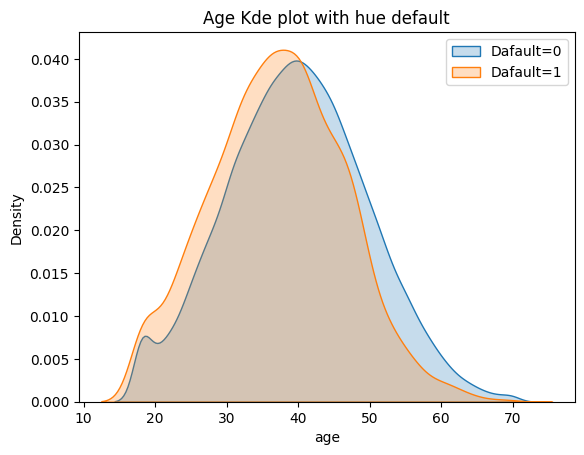

In [11]:
sns.kdeplot(df_train_1[df_train_1.default==0]['age'], fill=True, label= "Dafault=0")
sns.kdeplot(df_train_1[df_train_1.default==1]['age'], fill=True, label= "Dafault=1")
plt.title(f"Age Kde plot with hue default")
plt.legend()
plt.show()

### Insight: Age Distribution vs. Default Status

**Observation:**  
The KDE plot illustrates the age distribution of individuals segmented by their default status (`Default = 0` vs. `Default = 1`).

- Both groups show a **similar bell-shaped distribution**, centered roughly between **35–40 years**, suggesting this is the most common age range among customers.  
- The **Default = 1** group (orange curve) has **higher density between 25–40 years**, indicating that **younger individuals are more prone to default**.  
- The **Default = 0** group (blue curve) shows relatively higher density for **ages 40 and above**, implying **older individuals tend to repay more reliably**.  
- Beyond age 55, both curves decline, meaning defaults are less frequent among older customers due to fewer records in that range.

**Inference:**  
There is a **mild inverse relationship** between age and default likelihood — as age increases, default probability tends to decrease. Younger borrowers might have less financial stability or shorter credit histories.

**Next Steps:**  
- Bin age into groups (e.g., `<25`, `25–35`, `36–45`, `46–60`, `>60`) and calculate default rates per group.  
- Test statistical significance of age effect (e.g., using ANOVA or chi-square test after binning).  
- Consider including **Age** as an important predictive feature, possibly normalized or bucketized in your ML model.
